In [1]:
#zona imports.
import re
import networkx as nx
from scipy import stats
from scipy.stats import rv_discrete
import matplotlib.pyplot as plt

In [2]:
er_pipe = re.compile('\w+\|\w+')
erX = re.compile('\w*X')
erY = re.compile('\w*Y')
erZ = re.compile('\w*\|\w*')
prim_er = re.compile('WuXaYg')
seg_er = re.compile('WuXaYa')
terc_er = re.compile('WuXgZa')


In [3]:
terminales = ["u","a","g"]


In [4]:
no_terminales =    ["W","X","Y","Z"] 

In [5]:
prod = {
    "S" : "W",
    "W" : "uX",
    "X" : "aY|gZ",
    "Y" : "a|g",
    "Z" : "a"
}

In [6]:
primer_prod = "S"

In [7]:
xX =[0,1]
pX = (0.7,0.3) 

xY = [0,1]
pY = (0.2,0.8)

In [8]:
def calcularProbs(entrada):#Calcula las probabilidades de X o Y segun el argumento dado
    if entrada == 1:
        posibX = rv_discrete(name = 'X', values=([xX,pX]))
        return posibX
    elif entrada == 2:
        posibY = rv_discrete(name = 'Y', values=([xY,pY]))
        return posibY
    

In [9]:
def prod_random_X():#Devuelve una de las cadenas posibles de X
    prod_inicial1 = "X"
    prod_sig1 = prod[prod_inicial1]
    producciones1 = prod_sig1.split("|")

    prod_sig1 = producciones1[calcularProbs(1).rvs()]
    return prod_sig1

In [10]:
def prod_random_Y():#Devuelve una de las cadenas posibles de Y
    prod_inicial2 = "Y"
    prod_sig2 = prod[prod_inicial2]
    producciones2 = prod_sig2.split("|")

    prod_sig2 = producciones2[calcularProbs(2).rvs()]
    return prod_sig2

In [11]:
def producir_recur(iteracion):
    
    sig_prod = prod[primer_prod]
    if er_pipe.match(sig_prod):
        print(sig_prod)
        if erX.match(sig_prod):
            sig_prod = prod_random_X()
            producir(sig_prod,primer_prod,iteracion)
        elif erY.match(sig_prod):
            sig_prod = prod_random_Y()
            producir(sig_prod,primer_prod,iteracion)
    
    else:
        producir(sig_prod,primer_prod,iteracion)

   

In [12]:
mi_cadena = ''
mi_lista = []

In [13]:
def limpiar_lista(lista):
    b = 0
    while b<len(lista):
        l = lista.pop()
    return

In [14]:
def llenar_cadena(lista):
    var = 0
    cadena = ''
    while var < len(lista):
        cadena = cadena + str(lista[var])
        var = var+1
    return cadena

In [15]:
def graph1():
    
    G=nx.Graph()
    G.add_nodes_from(["W","u","X","a","Y","g"])

    G.add_edges_from([("W","u"),("W","X"),("X","a"), ("X","Y"),("Y","g")])
    nombres = {0:"W",1:"u",2:"X",3:"a",4:"Y",5:"g"}
    H=nx.relabel_nodes(G,nombres)

    nx.draw(H)
    plt.show() # display

In [16]:
def graph2():
    G=nx.Graph()
    G.add_nodes_from(["W","u","X","a1","Y","a2"])

    G.add_edges_from([("W","u"),("W","X"),("X","a1"),("X","Y"),("Y","a2")])
    nombres = {0:"W",1:"u",2:"X",3:"a1",4:"Y",5:"a2"}
    H=nx.relabel_nodes(G,nombres,True)

    nx.draw(H)
    plt.show() # display

In [17]:
def graph3():
    G=nx.Graph()
    G.add_nodes_from(["W","u","X","g","Z","a"])

    G.add_edges_from([("W","u"),("W","X"),("X","g"), ("X","Z"),("Z","a")])
    nombres = {0:"W",1:"u",2:"X",3:"g",4:"Z",5:"a"}
    H=nx.relabel_nodes(G,nombres)

    nx.draw(H)
    plt.show() # display

In [18]:
def producir(producciones, produccion_origen, iteraciones):
   
    ''' Caso Base profundidad alcanzada '''
    if iteraciones == 0:
        return

    if not (er_pipe.match(producciones)):#averiguo si no tiene pipe
        ''' Caso Base '''
        for p in producciones:   
            if (p not in terminales):
                print("dibujar no Terminal {}".format(p))
                prod_sig = prod[p]
                mi_lista.append(p)
                producir(prod_sig, p, iteraciones - 1)
                
            else:
                ''' Caso Base Terminal '''
                mi_lista.append(p)
                print("dibujar Terminal ({})".format(p))

    else:
        if erY.match(producciones):#encontre un Y por lo tanto tengo que pedir probs de X.
            producciones = prod_random_X()
            producir(producciones,primer_prod,iteraciones)
            return
            
        elif erZ.match(producciones):            
            producciones = prod_random_Y()
            producir(producciones,primer_prod,iteraciones )
            return
        return
            

In [21]:
def prod_prod_rec(tope,ite):
    a = 0
   
    while a<tope:
        print("PRODUCCION ",a)
        producir_recur(ite)
        mi_cadena = llenar_cadena(mi_lista)
        limpiar_lista(mi_lista)
        if prim_er.match(mi_cadena):
            graph1()
        if seg_er.match(mi_cadena):
            graph2()
        if terc_er.match(mi_cadena):
            graph3()
        a = a+1

PRODUCCION  0
dibujar no Terminal W
dibujar Terminal (u)
dibujar no Terminal X
dibujar Terminal (a)
dibujar no Terminal Y
dibujar Terminal (g)


/home/mati/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/mati/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/mati/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/mati/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprec

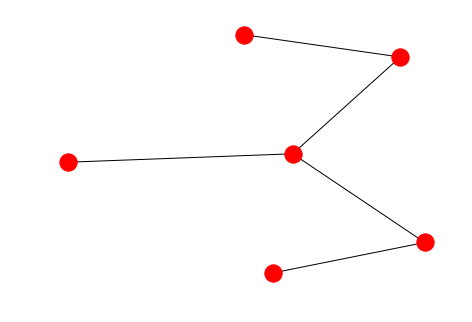

PRODUCCION  1
dibujar no Terminal W
dibujar Terminal (u)
dibujar no Terminal X
dibujar Terminal (g)
dibujar no Terminal Z
dibujar Terminal (a)


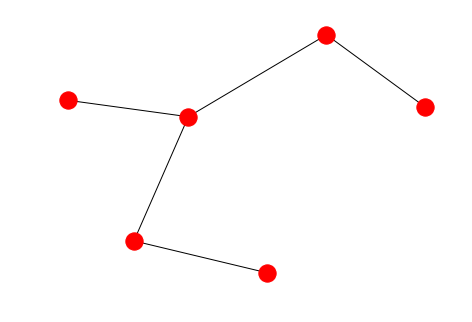

PRODUCCION  2
dibujar no Terminal W
dibujar Terminal (u)
dibujar no Terminal X
dibujar Terminal (a)
dibujar no Terminal Y
dibujar Terminal (a)


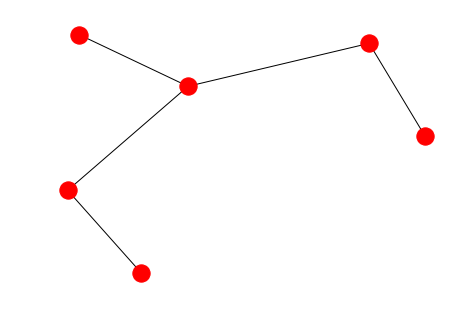

PRODUCCION  3
dibujar no Terminal W
dibujar Terminal (u)
dibujar no Terminal X
dibujar Terminal (a)
dibujar no Terminal Y
dibujar Terminal (g)


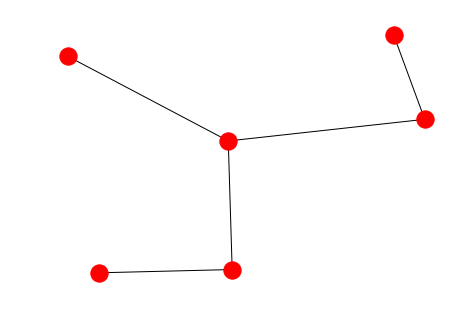

PRODUCCION  4
dibujar no Terminal W
dibujar Terminal (u)
dibujar no Terminal X
dibujar Terminal (a)
dibujar no Terminal Y
dibujar Terminal (g)


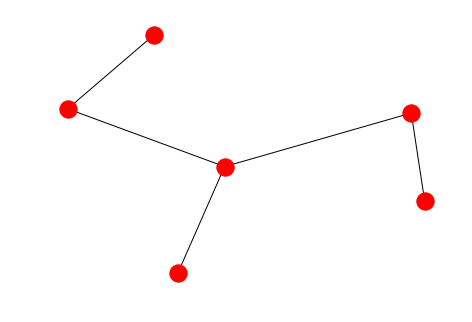

PRODUCCION  5
dibujar no Terminal W
dibujar Terminal (u)
dibujar no Terminal X
dibujar Terminal (a)
dibujar no Terminal Y
dibujar Terminal (g)


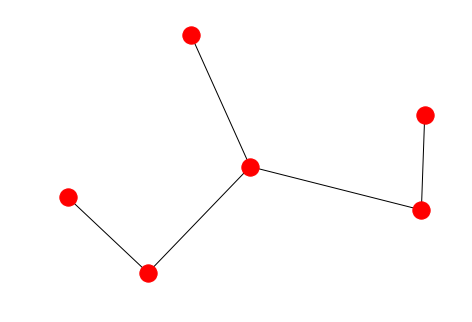

PRODUCCION  6
dibujar no Terminal W
dibujar Terminal (u)
dibujar no Terminal X
dibujar Terminal (a)
dibujar no Terminal Y
dibujar Terminal (g)


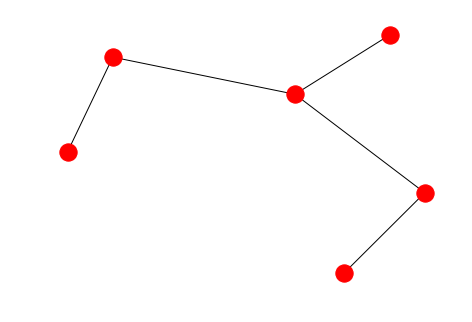

In [22]:
prod_prod_rec(7,5)
print(mi_cadena)